In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

Problem-2)
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

Solution:

In [ ]:
#loading data
from google.colab import files 
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
forestfires=pd.read_csv('forestfires.csv')
forestfires

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

Basic & EDA

In [ ]:
forestfires.shape

(517, 31)

In [ ]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

* Datatype of all features are correct

In [ ]:
forestfires.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

* There are no null values in dataset

In [ ]:
forestfires.duplicated().value_counts()

False    509
True       8
dtype: int64

* There are 8 duplicate in the given dataset.

In [ ]:
forestfires[forestfires.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [ ]:
#dropping the duplicate records from dataset
ffires=forestfires.copy()
ffires=forestfires.drop_duplicates().reset_index()
ffires=ffires.drop('index',axis=1)
ffires

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
504   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
505   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
506   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
507   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
508   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
504         0          large  
505         0          large  
506         0          large  
507         0          small  
508         0          small  

[509 rows x 31 columns]

In [ ]:
ffires.describe().T

count        mean         std   min    25%     50%     75%      max
FFMC      509.0   90.618075    5.555527  18.7   90.2   91.60   92.90    96.20
DMC       509.0  110.235756   63.804112   1.1   62.3  108.30  141.30   291.30
DC        509.0  547.787623  248.196222   7.9  437.7  664.20  713.90   860.60
ISI       509.0    9.023576    4.585083   0.0    6.4    8.40   11.00    56.10
temp      509.0   18.865422    5.841083   2.2   15.4   19.30   22.80    33.30
RH        509.0   44.253438   16.365192  15.0   32.0   42.00   53.00   100.00
wind      509.0    4.011395    1.800926   0.4    2.7    4.00    4.90     9.40
rain      509.0    0.020432    0.296261   0.0    0.0    0.00    0.00     6.40
area      509.0   12.992908   64.133357   0.0    0.0    0.61    6.58  1090.84
dayfri    509.0    0.163065    0.369788   0.0    0.0    0.00    0.00     1.00
daymon    509.0    0.145383    0.352833   0.0    0.0    0.00    0.00     1.00
daysat    509.0    0.161100    0.367985   0.0    0.0    0.00    0.00     1.00
daysun    509.0    0.184676    0.388416   0.0    0.0    0.00    0.00     1.00
daythu    509.0    0.117878    0.322781   0.0    0.0    0.00    0.00     1.00
daytue    509.0    0.123772    0.329645   0.0    0.0    0.00    0.00     1.00
daywed    509.0    0.104126    0.305724   0.0    0.0    0.00    0.00     1.00
monthapr  509.0    0.017682    0.131921   0.0    0.0    0.00    0.00     1.00
monthaug  509.0    0.349705    0.477346   0.0    0.0    0.00    1.00     1.00
monthdec  509.0    0.017682    0.131921   0.0    0.0    0.00    0.00     1.00
monthfeb  509.0    0.039293    0.194482   0.0    0.0    0.00    0.00     1.00
monthjan  509.0    0.003929    0.062622   0.0    0.0    0.00    0.00     1.00
monthjul  509.0    0.062868    0.242965   0.0    0.0    0.00    0.00     1.00
monthjun  509.0    0.031434    0.174660   0.0    0.0    0.00    0.00     1.00
monthmar  509.0    0.104126    0.305724   0.0    0.0    0.00    0.00     1.00
monthmay  509.0    0.003929    0.062622   0.0    0.0    0.00    0.00     1.00
monthnov  509.0    0.001965    0.044324   0.0    0.0    0.00    0.00     1.00
monthoct  509.0    0.029470    0.169285   0.0    0.0    0.00    0.00     1.00
monthsep  509.0    0.337917    0.473466   0.0    0.0    0.00    1.00     1.00

In [ ]:
# number of distinct values in each feature
for i, column in enumerate(ffires.columns, 1):
  print('Distinct values in feature ',ffires[column].name,' are ',ffires[column].nunique())

Distinct values in feature  month  are  12
Distinct values in feature  day  are  7
Distinct values in feature  FFMC  are  106
Distinct values in feature  DMC  are  215
Distinct values in feature  DC  are  219
Distinct values in feature  ISI  are  119
Distinct values in feature  temp  are  192
Distinct values in feature  RH  are  75
Distinct values in feature  wind  are  21
Distinct values in feature  rain  are  7
Distinct values in feature  area  are  251
Distinct values in feature  dayfri  are  2
Distinct values in feature  daymon  are  2
Distinct values in feature  daysat  are  2
Distinct values in feature  daysun  are  2
Distinct values in feature  daythu  are  2
Distinct values in feature  daytue  are  2
Distinct values in feature  daywed  are  2
Distinct values in feature  monthapr  are  2
Distinct values in feature  monthaug  are  2
Distinct values in feature  monthdec  are  2
Distinct values in feature  monthfeb  are  2
Distinct values in feature  monthjan  are  2
Distinct value

Visualizing data points

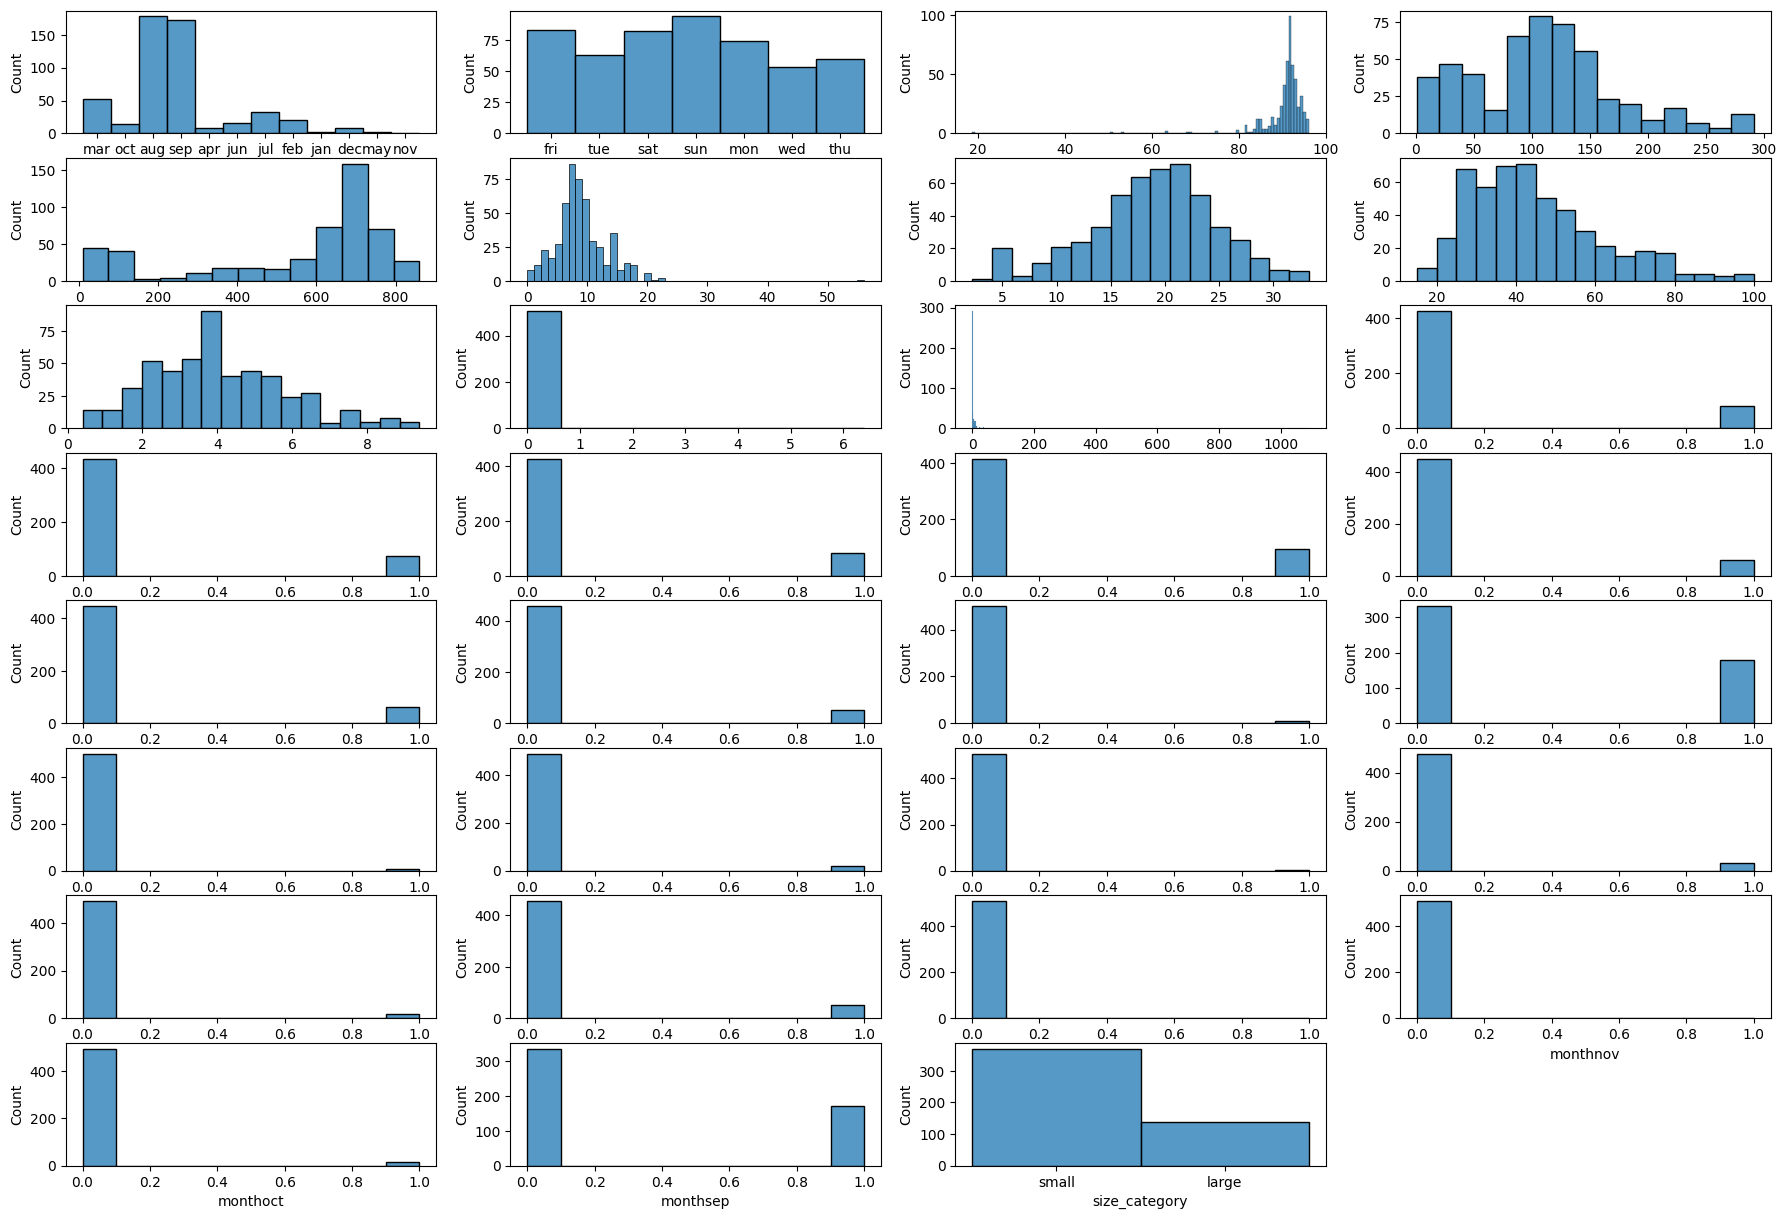

In [ ]:
#plotting histplot to observe datapoints nature
plt.figure(figsize=(22,15))
for i, column in enumerate(ffires.columns, 1):
  plt.subplot(8,4,i)
  sns.histplot(ffires[column])

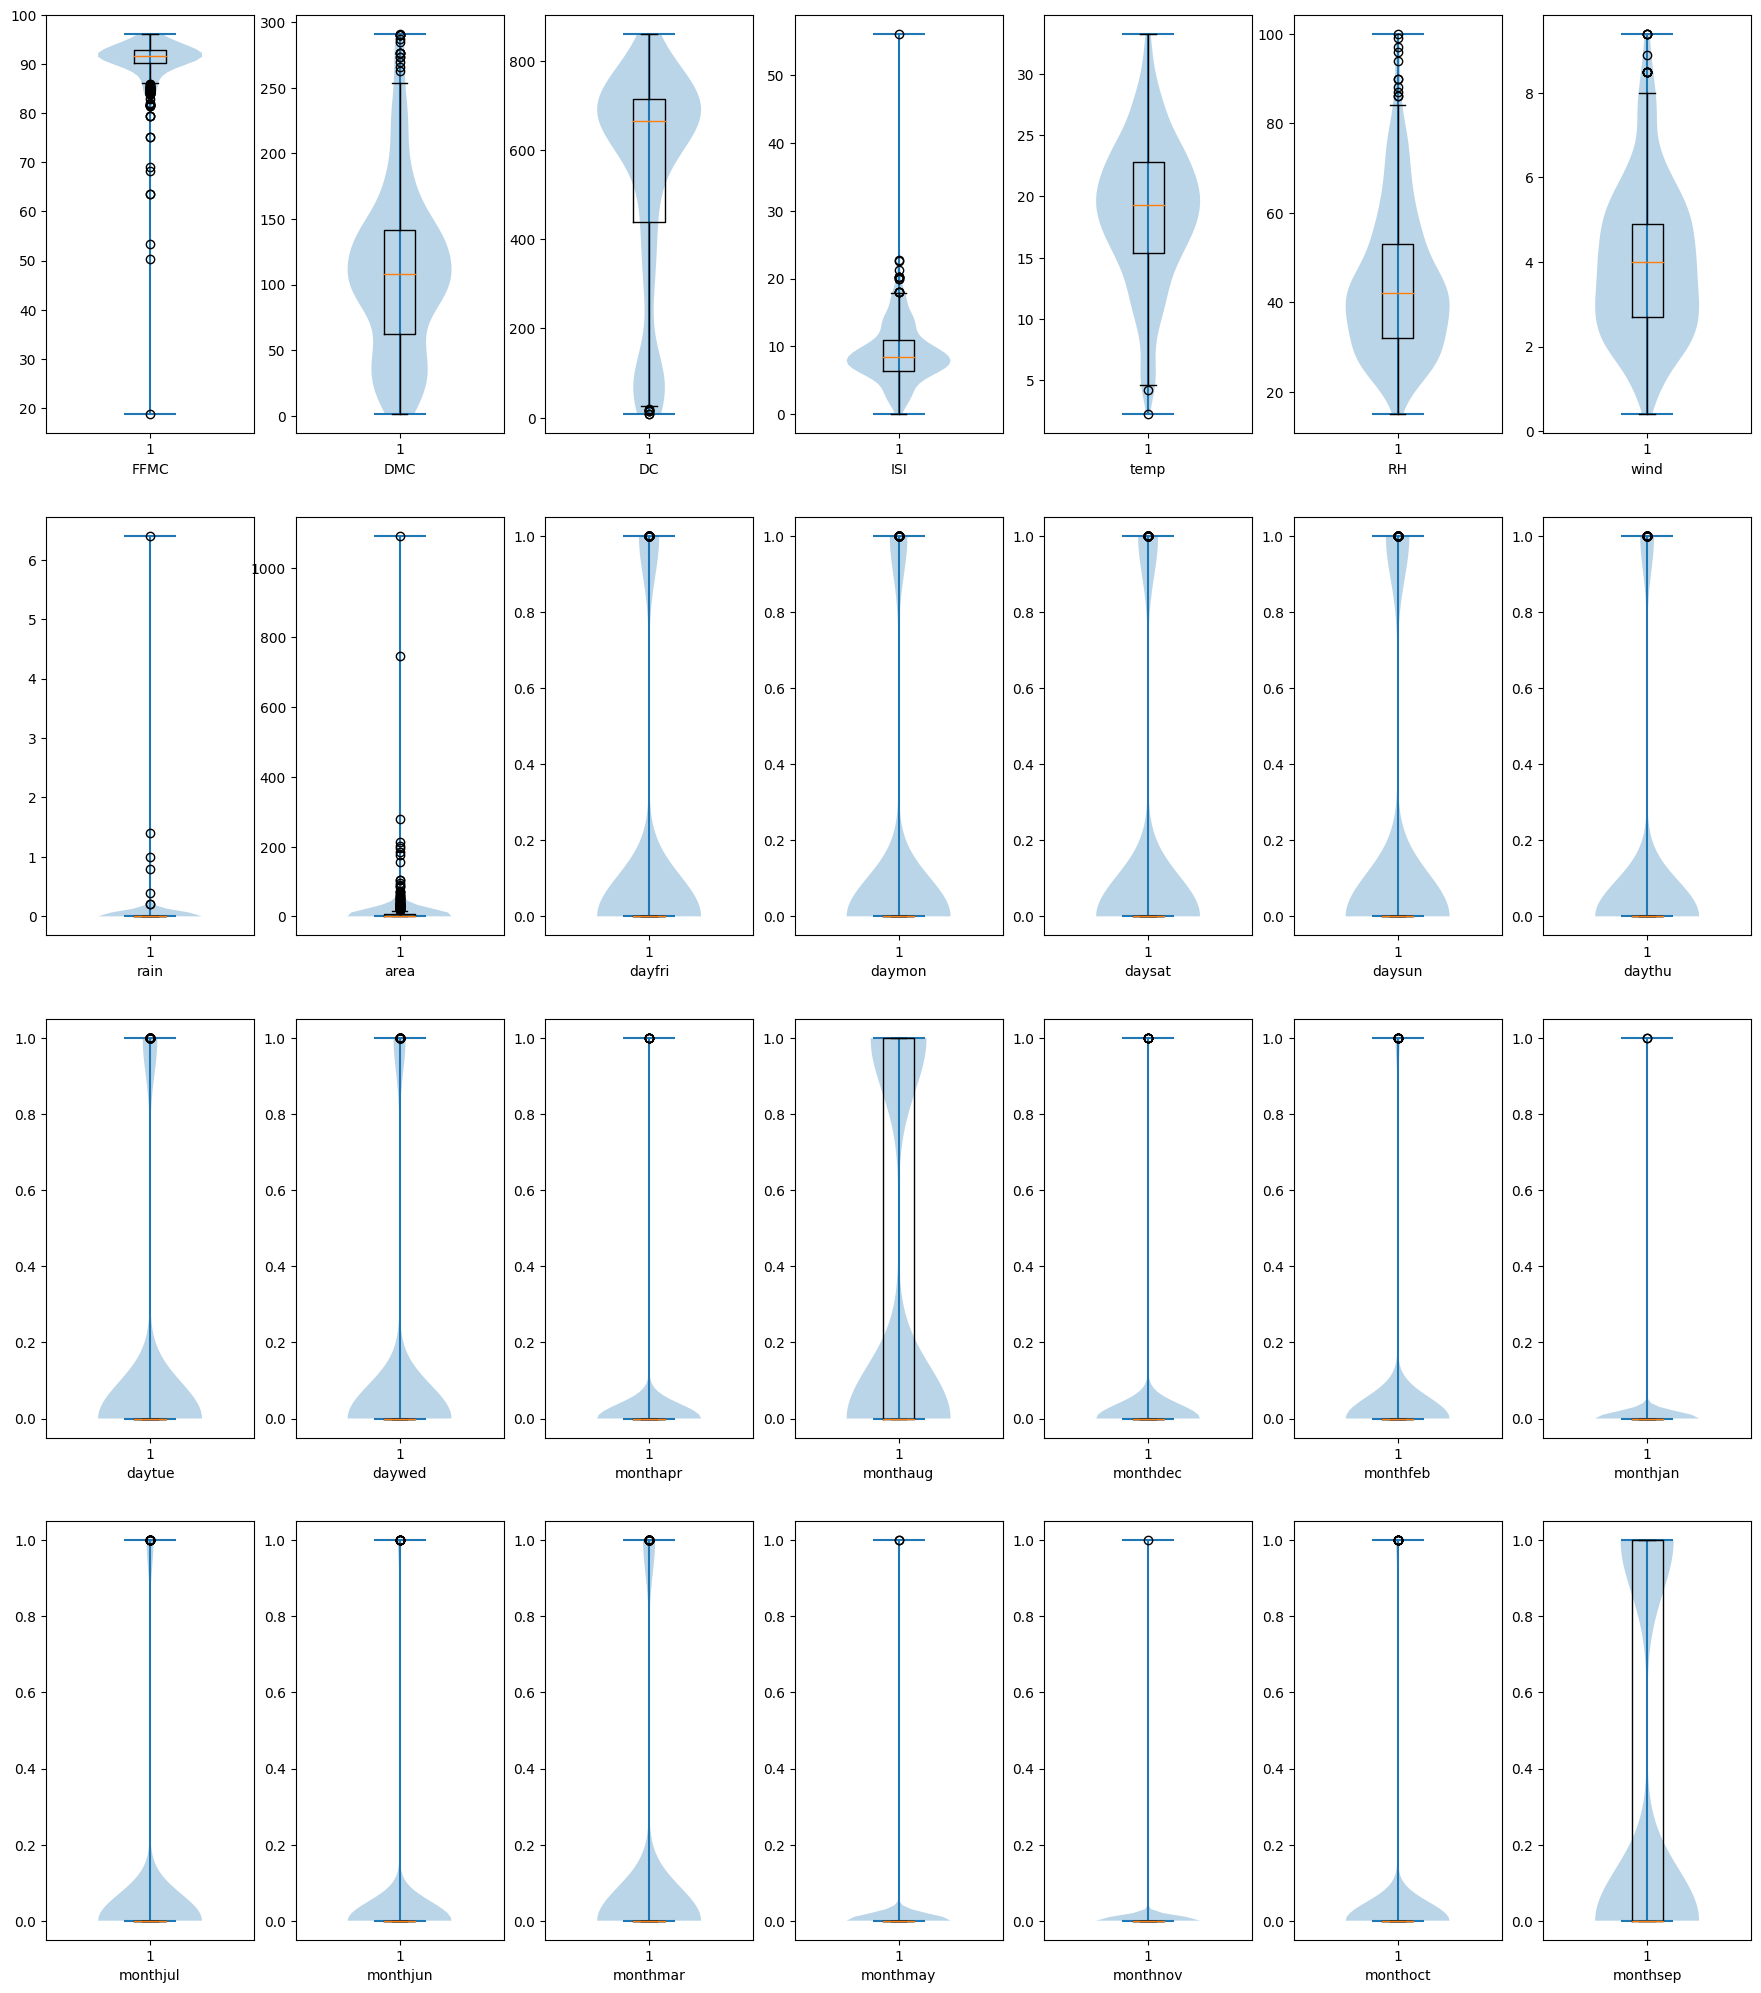

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,25))
for i, column in enumerate(ffires[[feature for feature in ffires.columns if ffires[feature].dtypes != 'O']].columns, 1):
    plt.subplot(4,7,i)
    plt.violinplot(ffires[column])
    plt.boxplot(ffires[column])
    plt.xlabel(ffires[column].name)

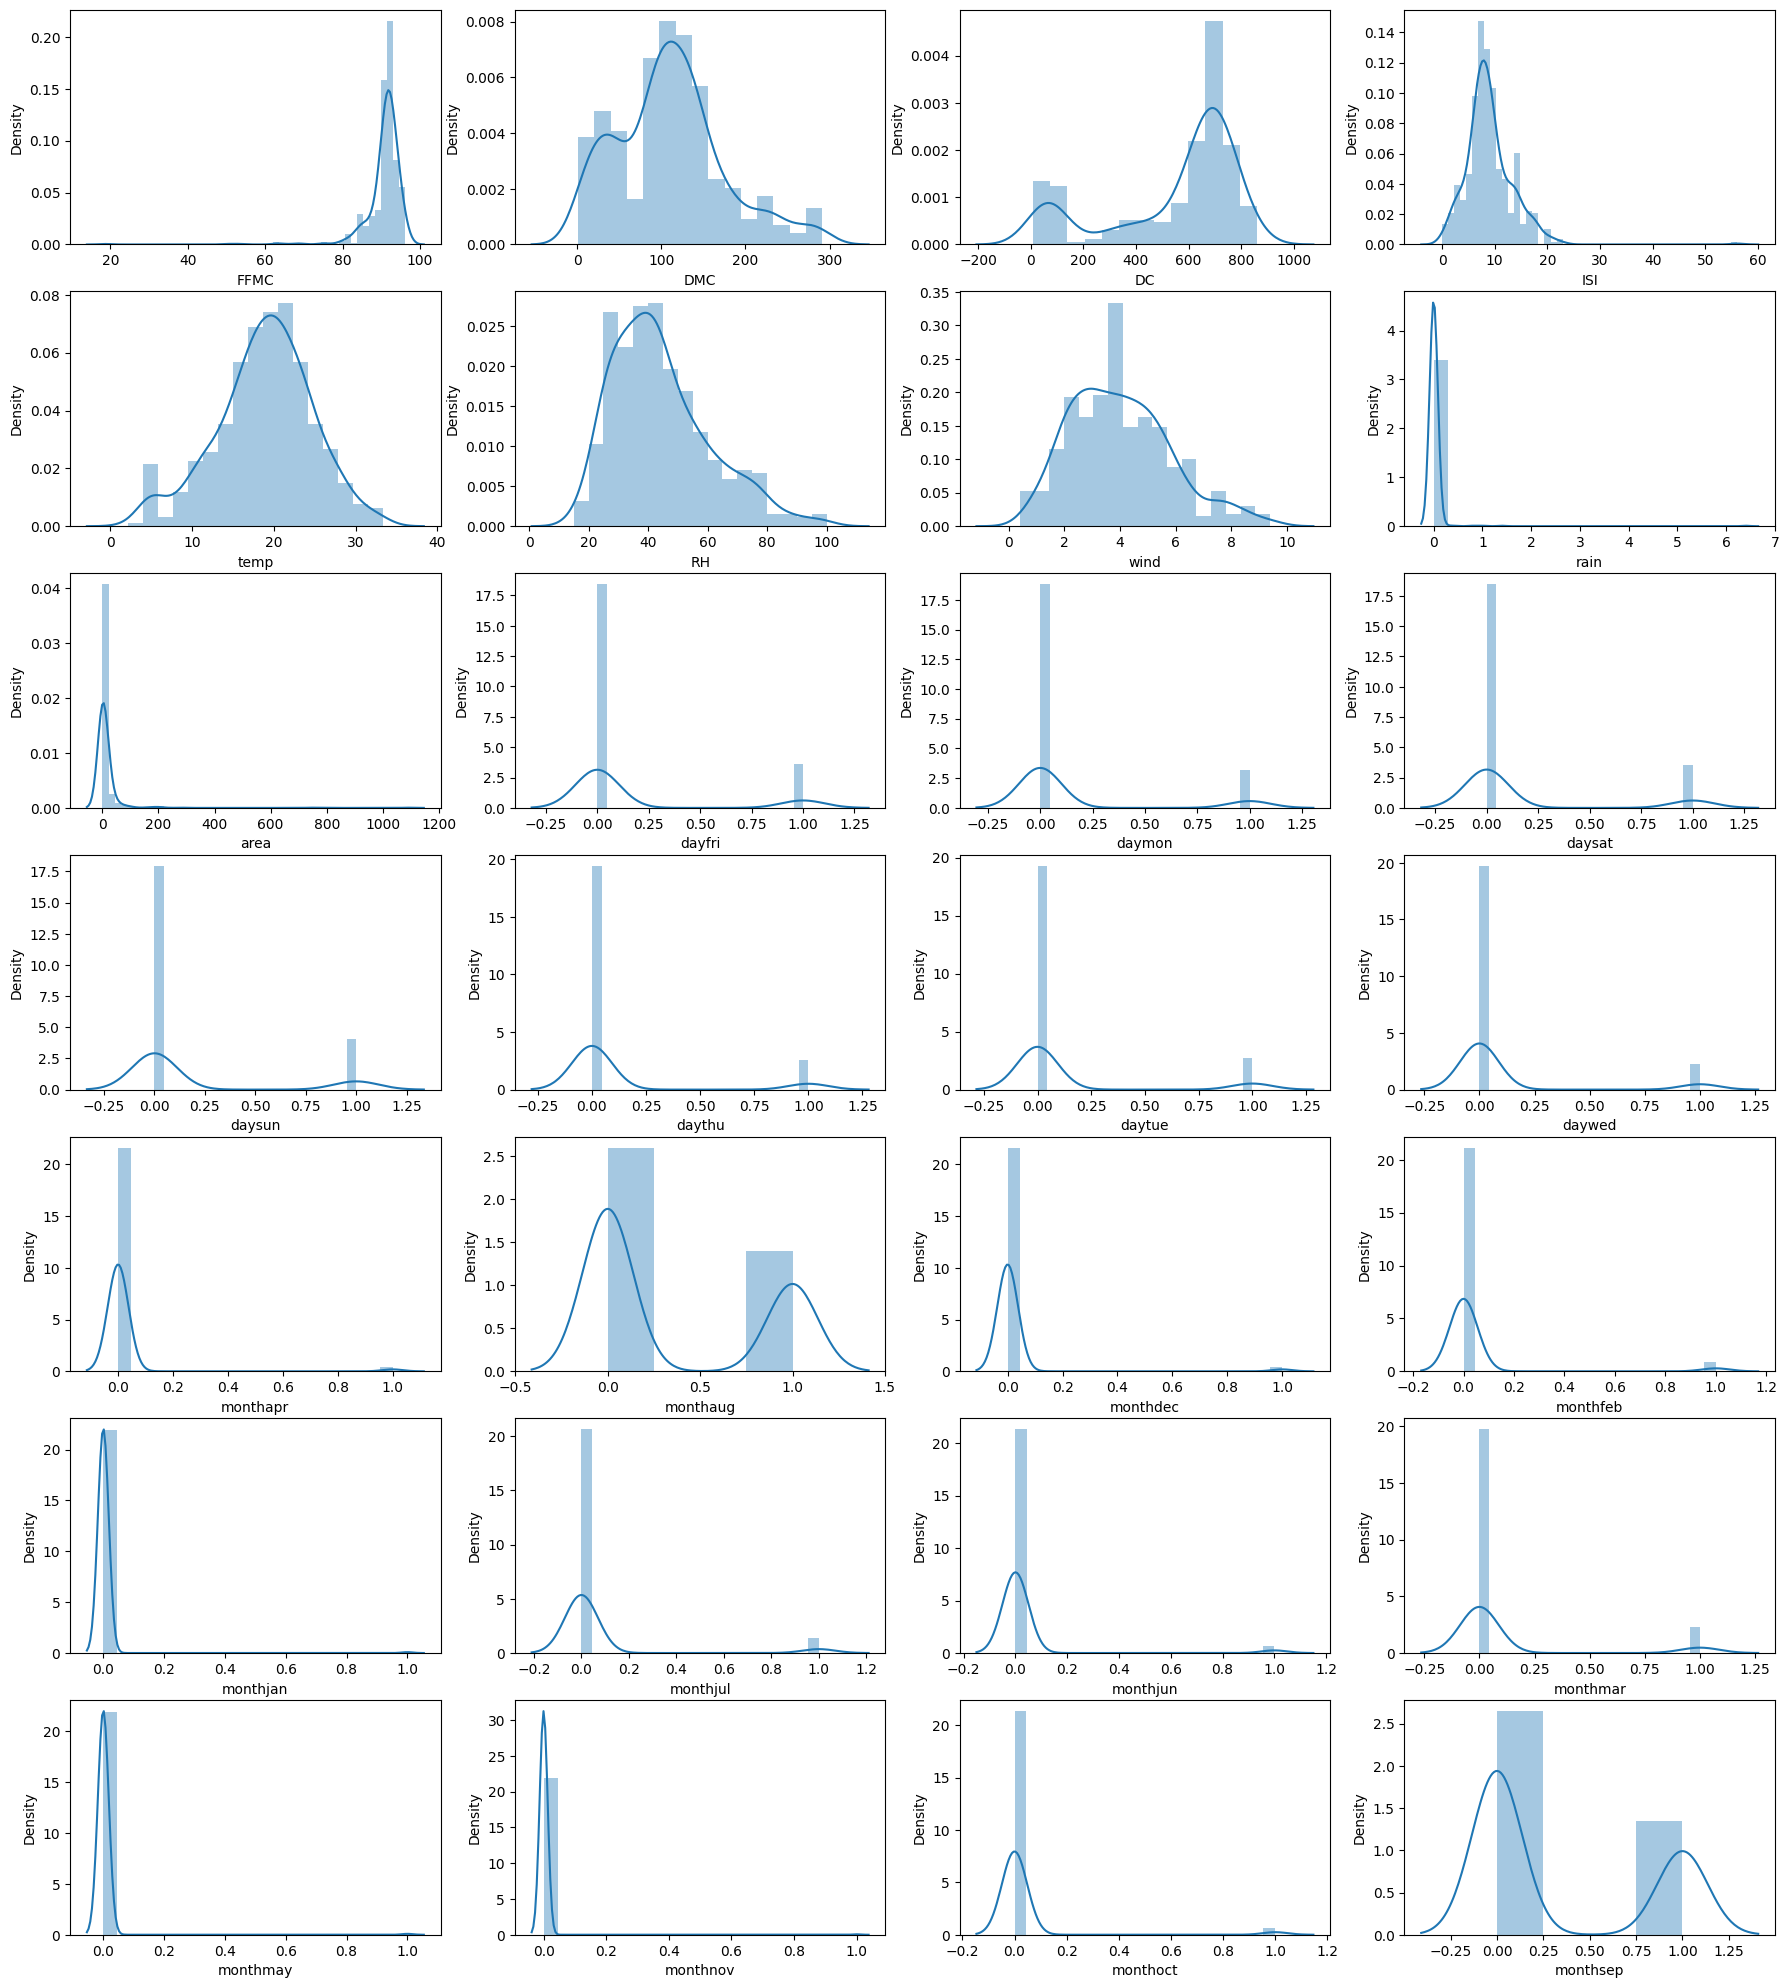

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,25))
for i, column in enumerate(ffires[[feature for feature in ffires.columns if ffires[feature].dtypes != 'O']].columns, 1):
    plt.subplot(7,4,i)
    sns.distplot(ffires[column])

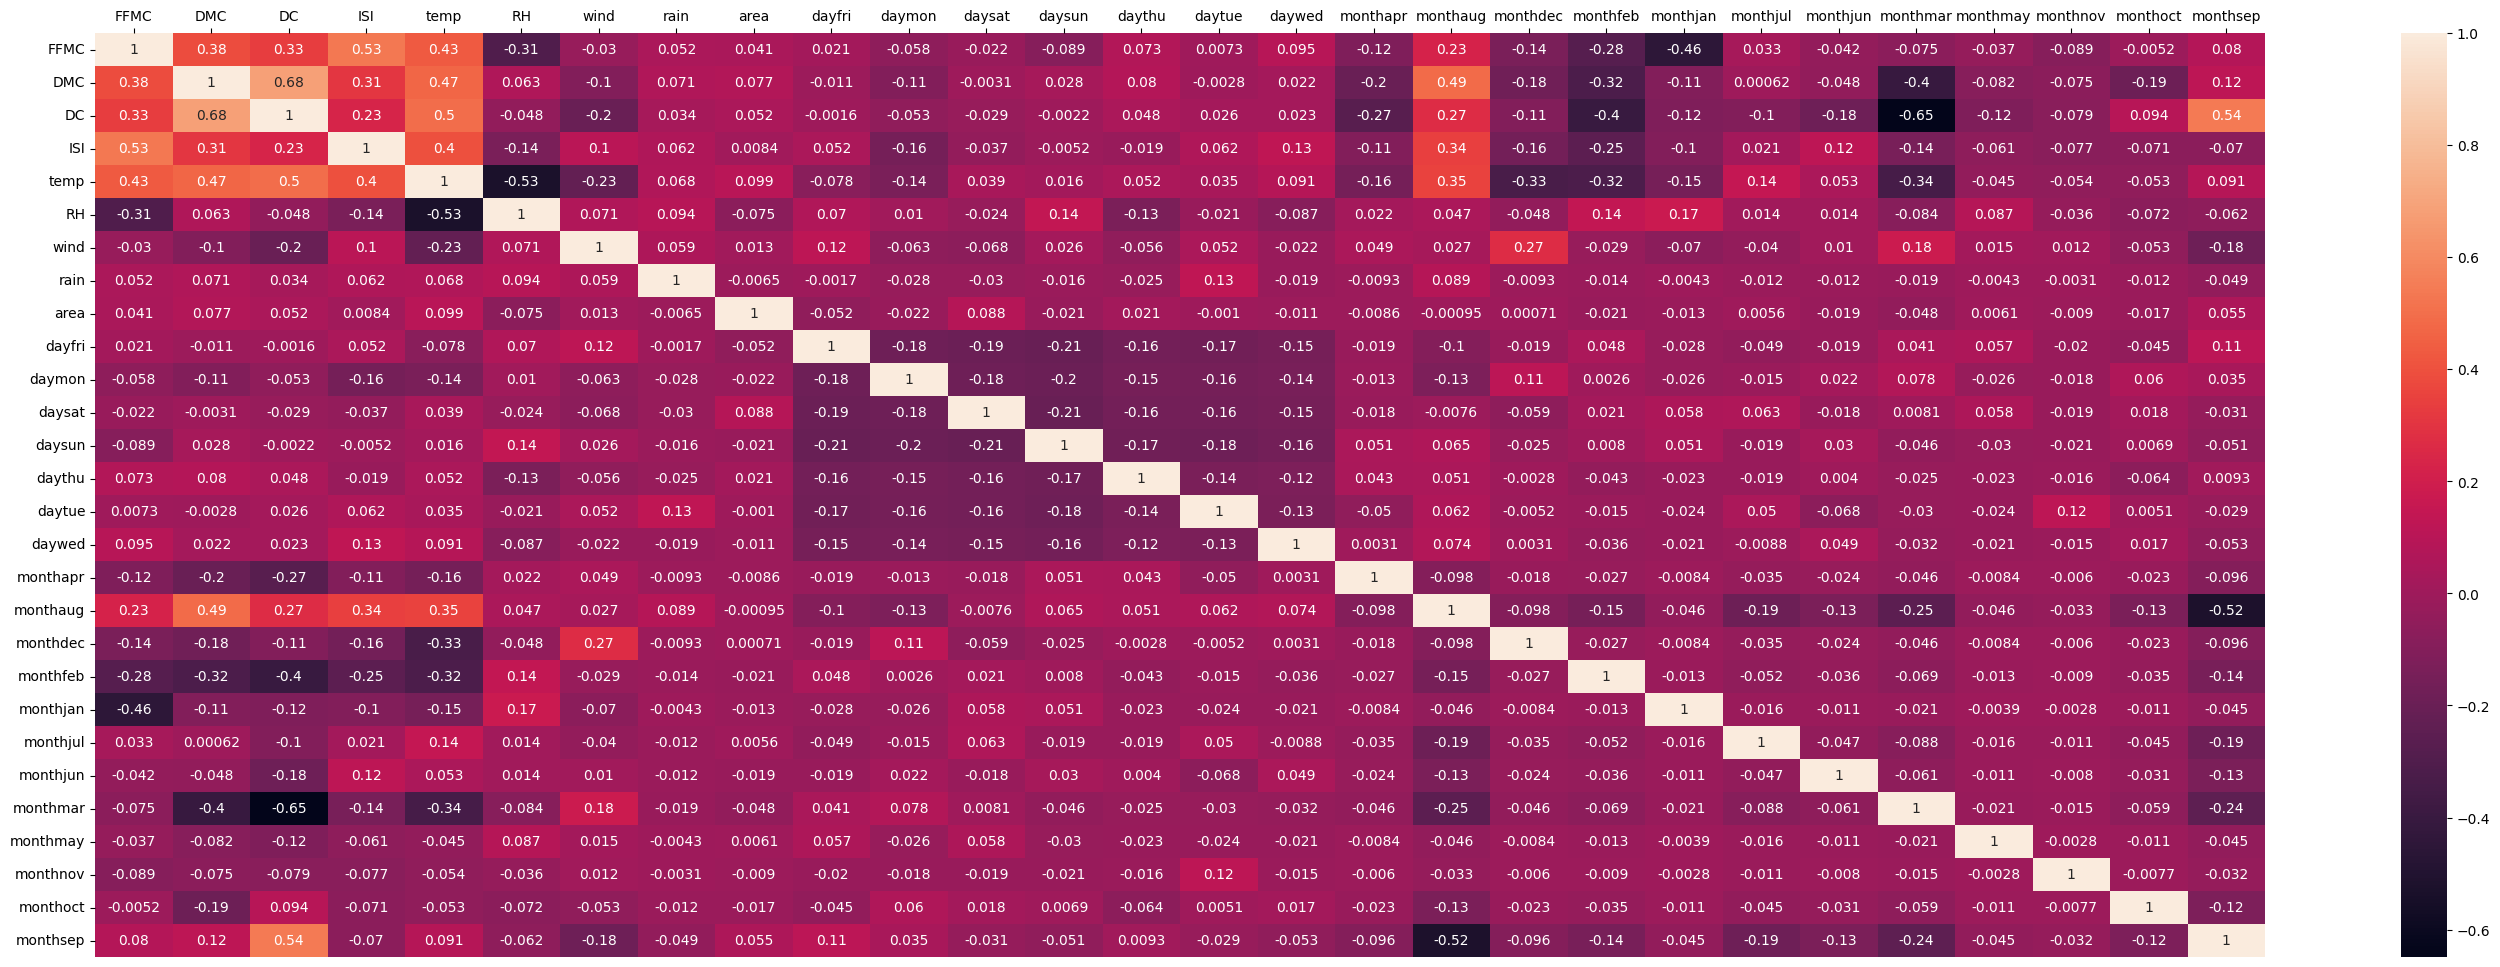

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(35,12))
ax = sns.heatmap(ffires.corr(), annot=True)
ax.xaxis.tick_top()

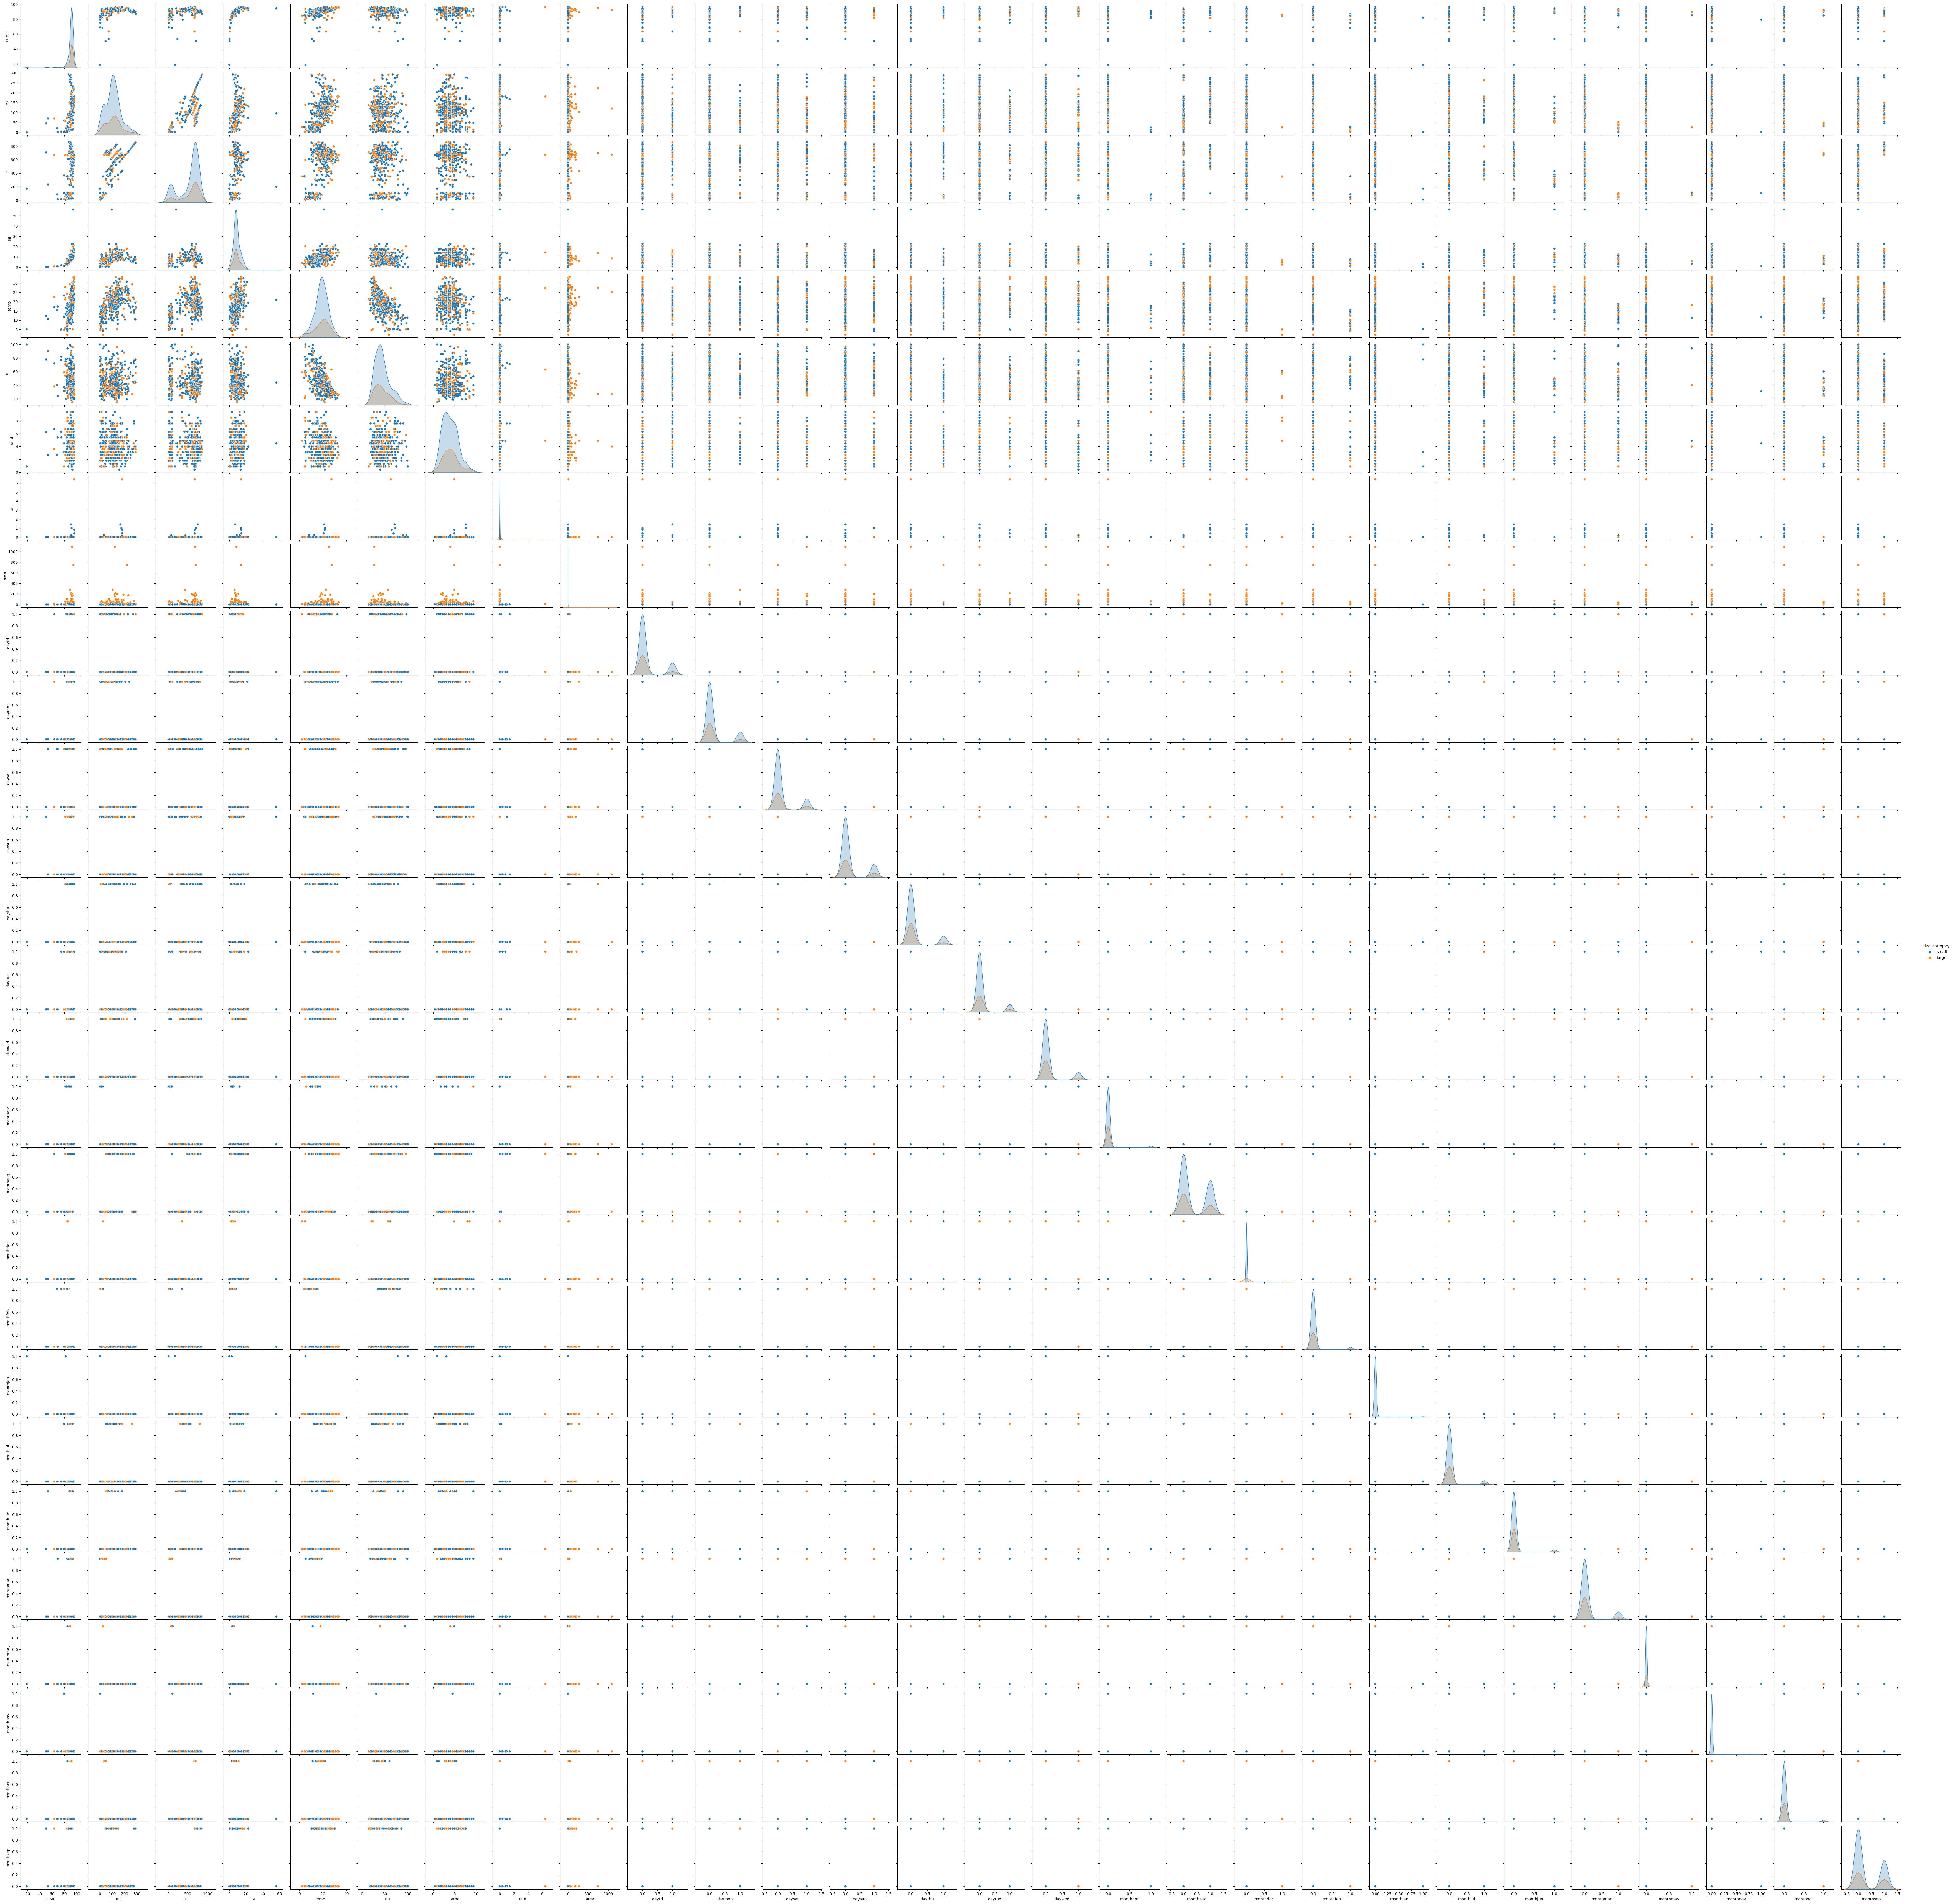

In [ ]:
#pairplot
sns.pairplot(ffires,hue='size_category')

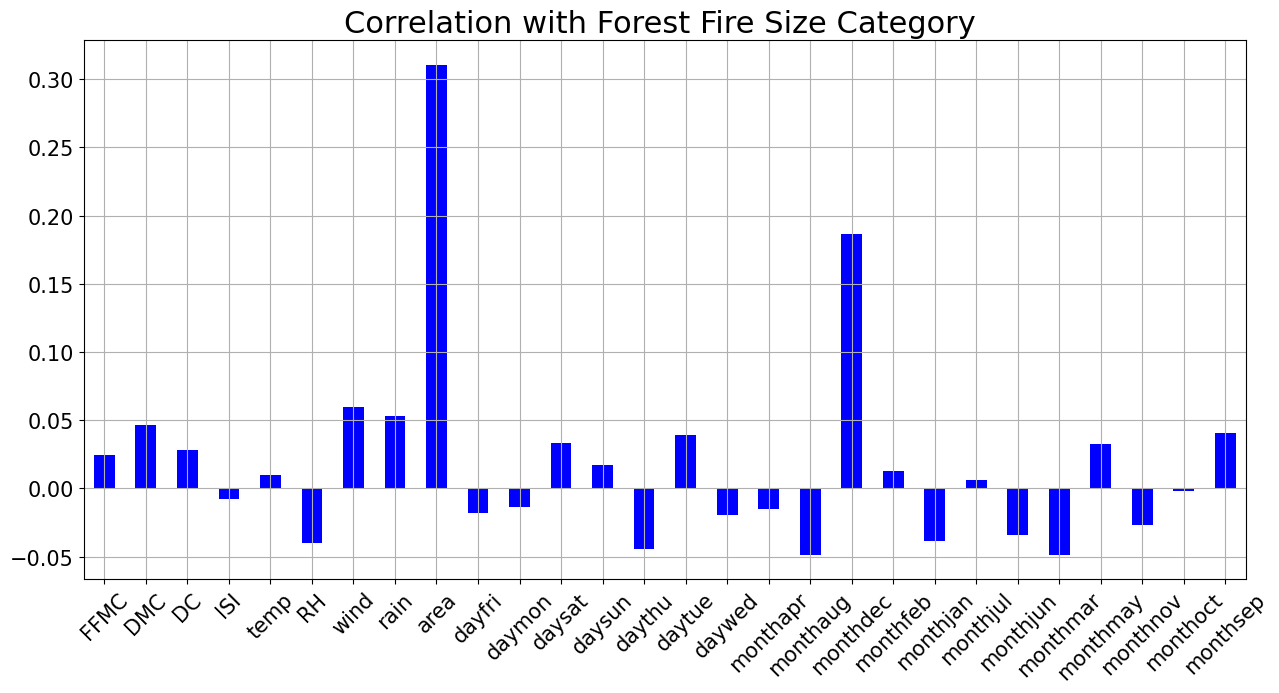

In [ ]:
#Correlation with Forest Fire Size Category
df = ffires.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = ffires.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize= (15,7), fontsize = 15, color = 'blue', rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category ', horizontalalignment="center", fontsize = "22");
     

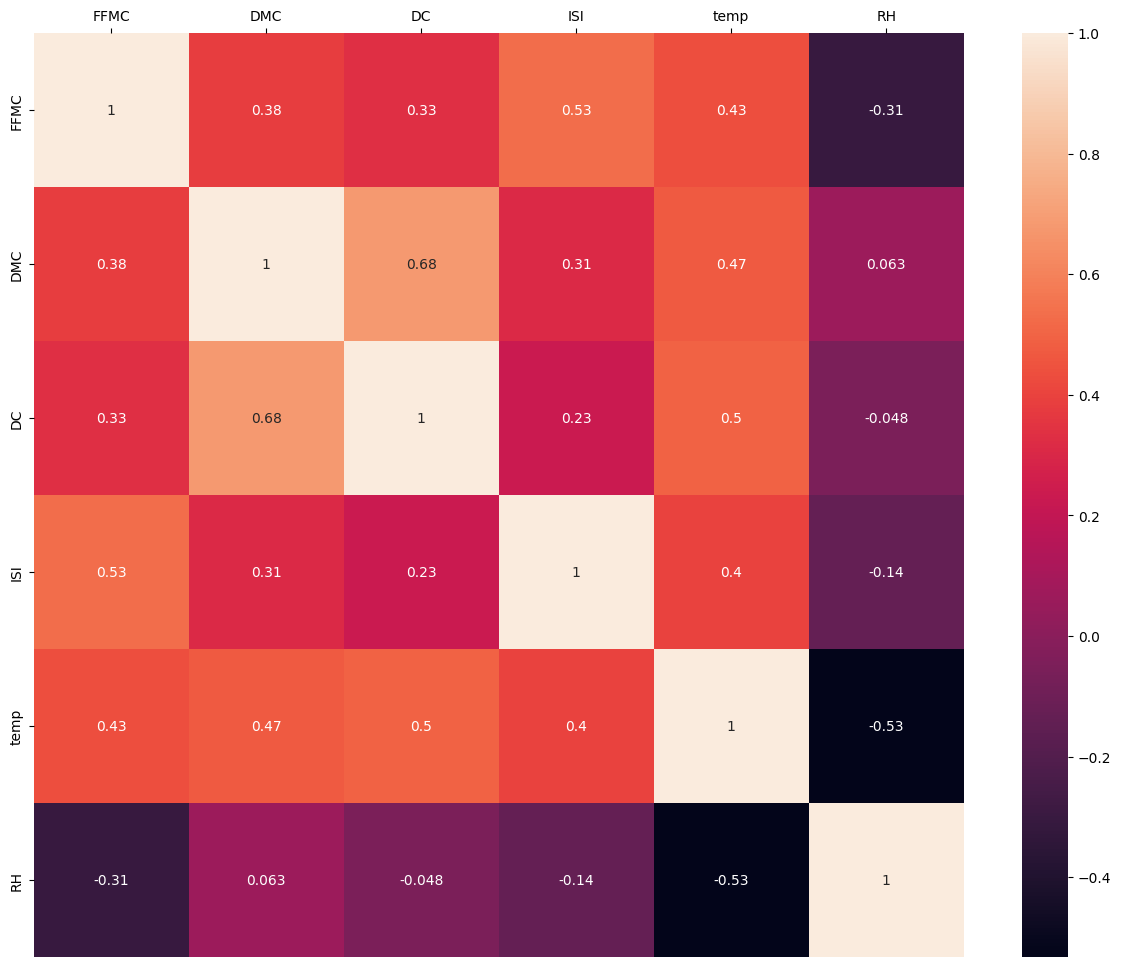

In [ ]:
#plotting the heatmap for correlation (standrad feature)
plt.figure(figsize=(15,12))
ax = sns.heatmap(ffires.iloc[:,:8].corr(), annot=True)
ax.xaxis.tick_top()

Label Encoding

In [ ]:
from sklearn import preprocessing 
ffires_lab=ffires.copy()
for i, column in enumerate(ffires_lab[[feature for feature in ffires_lab.columns if ffires_lab[feature].dtypes == 'O']].columns, 1):
  label_encoder=preprocessing.LabelEncoder()
  ffires_lab[column]=label_encoder.fit_transform(ffires_lab[column])
ffires_lab

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  \
0        7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...   
1       10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...   
2       10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...   
3        7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...   
4        7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...   
504      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...   
505      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...   
506      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...   
507      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...   
508      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
504         0         0              0  
505         0         0              0  
506         0         0              0  
507         0         0              1  
508         0         0              1  

[509 rows x 31 columns]

Standradising Data 

In [ ]:
std = StandardScaler()
ffires_std=ffires_lab.copy()
std.fit_transform(ffires_std)

array([[ 2.71858196e-01, -1.42449474e+00, -7.96039810e-01, ...,
        -1.74253759e-01, -7.14412875e-01,  6.09891511e-01],
       [ 9.58019296e-01,  1.17804590e+00, -3.25665522e-03, ...,
         5.73875712e+00, -7.14412875e-01,  6.09891511e-01],
       [ 9.58019296e-01, -3.83478484e-01, -3.25665522e-03, ...,
         5.73875712e+00, -7.14412875e-01,  6.09891511e-01],
       ...,
       [-1.10046400e+00,  1.37029645e-01, -1.62485856e+00, ...,
        -1.74253759e-01, -7.14412875e-01, -1.63963587e+00],
       [-1.10046400e+00, -3.83478484e-01,  6.81419706e-01, ...,
        -1.74253759e-01, -7.14412875e-01,  6.09891511e-01],
       [ 7.29298930e-01,  1.17804590e+00, -2.00323234e+00, ...,
        -1.74253759e-01, -7.14412875e-01,  6.09891511e-01]])

In [ ]:
ffires_std=pd.DataFrame(std.fit_transform(ffires_std),columns=ffires_lab.columns)
ffires_std

month       day      FFMC       DMC        DC       ISI      temp  \
0    0.271858 -1.424495 -0.796040 -1.318386 -1.828931 -0.856568 -1.827729   
1    0.958019  1.178046 -0.003257 -1.174053  0.489257 -0.507267 -0.148307   
2    0.958019 -0.383478 -0.003257 -1.043839  0.561045 -0.507267 -0.730964   
3    0.271858 -1.424495  0.194939 -1.206998 -1.896686 -0.005147 -1.810592   
4    0.271858  0.137030 -0.237488 -0.924607 -1.797070  0.125841 -1.279346   
..        ...       ...       ...       ...       ...       ...       ...   
504 -1.100464  0.137030 -1.624859 -0.839890  0.475141 -1.555170  1.531115   
505 -1.100464  0.137030 -1.624859 -0.839890  0.475141 -1.555170  0.520034   
506 -1.100464  0.137030 -1.624859 -0.839890  0.475141 -1.555170  0.400076   
507 -1.100464 -0.383478  0.681420  0.561083  0.269860  0.496973  1.154102   
508  0.729299  1.178046 -2.003232 -1.682356 -1.778921 -1.729820 -1.210798   

           RH      wind      rain  ...  monthfeb  monthjan  monthjul  \
0    0.412656  1.494370 -0.069035  ... -0.202237 -0.062807  -0.25901   
1   -0.688321 -1.729364 -0.069035  ... -0.202237 -0.062807  -0.25901   
2   -0.688321 -1.507037 -0.069035  ... -0.202237 -0.062807  -0.25901   
3    3.226265 -0.006333  0.606709  ... -0.202237 -0.062807  -0.25901   
4    3.348596 -1.229129 -0.069035  ... -0.202237 -0.062807  -0.25901   
..        ...       ...       ...  ...       ...       ...       ...   
504 -0.749487 -0.728894 -0.069035  ... -0.202237 -0.062807  -0.25901   
505  1.635965  0.994136 -0.069035  ... -0.202237 -0.062807  -0.25901   
506  1.574799  1.494370 -0.069035  ... -0.202237 -0.062807  -0.25901   
507 -0.137832 -0.006333 -0.069035  ... -0.202237 -0.062807  -0.25901   
508 -0.810652  0.271575 -0.069035  ... -0.202237 -0.062807  -0.25901   

     monthjun  monthmar  monthmay   monthnov  monthoct  monthsep  \
0   -0.180151  2.933219 -0.062807  -0.044368 -0.174254 -0.714413   
1   -0.180151 -0.340922 -0.062807  -0.044368  5.738757 -0.714413   
2   -0.180151 -0.340922 -0.062807  -0.044368  5.738757 -0.714413   
3   -0.180151  2.933219 -0.062807  -0.044368 -0.174254 -0.714413   
4   -0.180151  2.933219 -0.062807  -0.044368 -0.174254 -0.714413   
..        ...       ...       ...        ...       ...       ...   
504 -0.180151 -0.340922 -0.062807  -0.044368 -0.174254 -0.714413   
505 -0.180151 -0.340922 -0.062807  -0.044368 -0.174254 -0.714413   
506 -0.180151 -0.340922 -0.062807  -0.044368 -0.174254 -0.714413   
507 -0.180151 -0.340922 -0.062807  -0.044368 -0.174254 -0.714413   
508 -0.180151 -0.340922 -0.062807  22.538855 -0.174254 -0.714413   

     size_category  
0         0.609892  
1         0.609892  
2         0.609892  
3         0.609892  
4         0.609892  
..             ...  
504      -1.639636  
505      -1.639636  
506      -1.639636  
507       0.609892  
508       0.609892  

[509 rows x 31 columns]

Data Splitting 

In [ ]:
x=ffires_std.drop('size_category',axis=1)
y=ffires_std['size_category']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((341, 30), (168, 30), (341,), (168,))

Tuning of Hyperparameters

Batch Size

Epochs

In [ ]:
# libs
import tensorflow
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#optimizers
from tensorflow.keras.optimizers import Adam

In [ ]:
#model def creation
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(12, input_dim=30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
#model
model=KerasClassifier(build_fn=create_model,verbose=0)
#hyper param 
batch_size=[10,20]
epochs=[10,20,50]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=10, epochs=10....................................
[CV 1/5; 1/6] END .....batch_size=10, epochs=10;, score=1.000 total time=   5.4s
[CV 2/5; 1/6] START batch_size=10, epochs=10....................................
[CV 2/5; 1/6] END .....batch_size=10, epochs=10;, score=0.843 total time=   2.4s
[CV 3/5; 1/6] START batch_size=10, epochs=10....................................
[CV 3/5; 1/6] END .....batch_size=10, epochs=10;, score=0.853 total time=   2.6s
[CV 4/5; 1/6] START batch_size=10, epochs=10....................................
[CV 4/5; 1/6] END .....batch_size=10, epochs=10;, score=0.863 total time=   2.7s
[CV 5/5; 1/6] START batch_size=10, epochs=10....................................
[CV 5/5; 1/6] END .....batch_size=10, epochs=10;, score=0.871 total time=   1.9s
[CV 1/5; 2/6] START batch_size=10, epochs=20....................................
[CV 1/5; 2/6] END .....batch_size=10, epochs=20;,

In [ ]:
#summarizing results
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with:{}'.format(mean,stdev,param))

Best:0.9095903635025024,using{'batch_size': 20, 'epochs': 50}
0.8860221266746521,0.057763930204439956 with:{'batch_size': 10, 'epochs': 10}
0.9076489925384521,0.04908362274617995 with:{'batch_size': 10, 'epochs': 20}
0.8977479934692383,0.043972313085050674 with:{'batch_size': 10, 'epochs': 50}
0.840924084186554,0.05075165327183504 with:{'batch_size': 20, 'epochs': 10}
0.8919044733047485,0.06115135149015037 with:{'batch_size': 20, 'epochs': 20}
0.9095903635025024,0.0517293357399282 with:{'batch_size': 20, 'epochs': 50}


Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout
#model def
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(8,input_dim=30,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(12,input_dim=8,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]
#grid search dictionary
param_grids=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.980 total time=   3.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.765 total time=   2.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.647 total time=   2.6s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.765 total time=   3.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.752 total time=   4.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   2.5s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.853 total time=   2.8s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.902 total time=   3.1s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.912 total time=   2.5s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.871 total time=   2.5s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1...........

In [ ]:
#summarizing results
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with:{}'.format(mean,stdev,param))

Best:0.9075907468795776,using{'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7818676114082337,0.10866311092274172 with:{'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9075907468795776,0.05078015416203463 with:{'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8468646883964539,0.1041339782398046 with:{'dropout_rate': 0.0, 'learning_rate': 0.1}
0.760454285144806,0.14743295071771173 with:{'dropout_rate': 0.1, 'learning_rate': 0.001}
0.899767029285431,0.052839233658165424 with:{'dropout_rate': 0.1, 'learning_rate': 0.01}
0.854513680934906,0.0780494072977578 with:{'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7739856481552124,0.12262316877801718 with:{'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9016695737838745,0.05606313951637764 with:{'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7408464431762696,0.10245526637327883 with:{'dropout_rate': 0.2, 'learning_rate': 0.1}


Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
#model def
def create_model(activation_function,init):
  model=Sequential()
  model.add(Dense(8,input_dim=30,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(12,input_dim=8,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']
#grid search dictionary
param_grids=dict(activation_function=activation_function,init=init)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   4.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.765 total time=   4.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.510 total time=   2.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.676 total time=   3.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.693 total time=   2.8s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [ ]:
# Summarizin results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8664336919784545, using {'activation_function': 'tanh', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7386138677597046,0.15722851017976838 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7623762488365173,0.15752749503541458 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.8664336919784545,0.07188768975582127 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8428460359573364,0.07839711779202892 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8487478137016297,0.07729907173629542 with: {'activation_functio

Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
#model def
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=30,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
neuron1=[4,8,16]
neuron2=[2,4,8]
#grid search dictionary
param_grids=dict(neuron1=neuron1,neuron2=neuron2)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)
     

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.990 total time=   6.6s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.765 total time=   7.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.686 total time=   5.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.716 total time=   4.5s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.752 total time=   4.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [ ]:
# Summarizing the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8644923210144043, using {'neuron1': 16, 'neuron2': 8}
0.7818675994873047,0.10777493329875315 with: {'neuron1': 4, 'neuron2': 2}
0.7956319212913513,0.09919352686324341 with: {'neuron1': 4, 'neuron2': 4}
0.8153368234634399,0.09264992444108383 with: {'neuron1': 4, 'neuron2': 8}
0.7838283777236938,0.1075337863175139 with: {'neuron1': 8, 'neuron2': 2}
0.8270821094512939,0.08316071594791306 with: {'neuron1': 8, 'neuron2': 4}
0.850689172744751,0.0745044084806892 with: {'neuron1': 8, 'neuron2': 8}
0.8251213312149048,0.08538756388078424 with: {'neuron1': 16, 'neuron2': 2}
0.8506697654724121,0.07271753578758194 with: {'neuron1': 16, 'neuron2': 4}
0.8644923210144043,0.07207042603386446 with: {'neuron1': 16, 'neuron2': 8}


Training model with optimum values of Hyperparameters

In [ ]:
# Python program to define a function to compute accuracy score of model's predicted class  
  
# Defining a function which takes true values of the sample and values predicted by the model  
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
#model def
def create_model():
  model=Sequential()
  model.add(Dense(16,input_dim=30,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(4,input_dim=16,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=20,epochs=50)
#model fit
model.fit(x,y)
#prediction on train 
y_pred=model.predict(x)
#printing mertics
compute_accuracy(y,y_pred)

16/16 [==============================] - 0s 2ms/step


0.9941060903732809

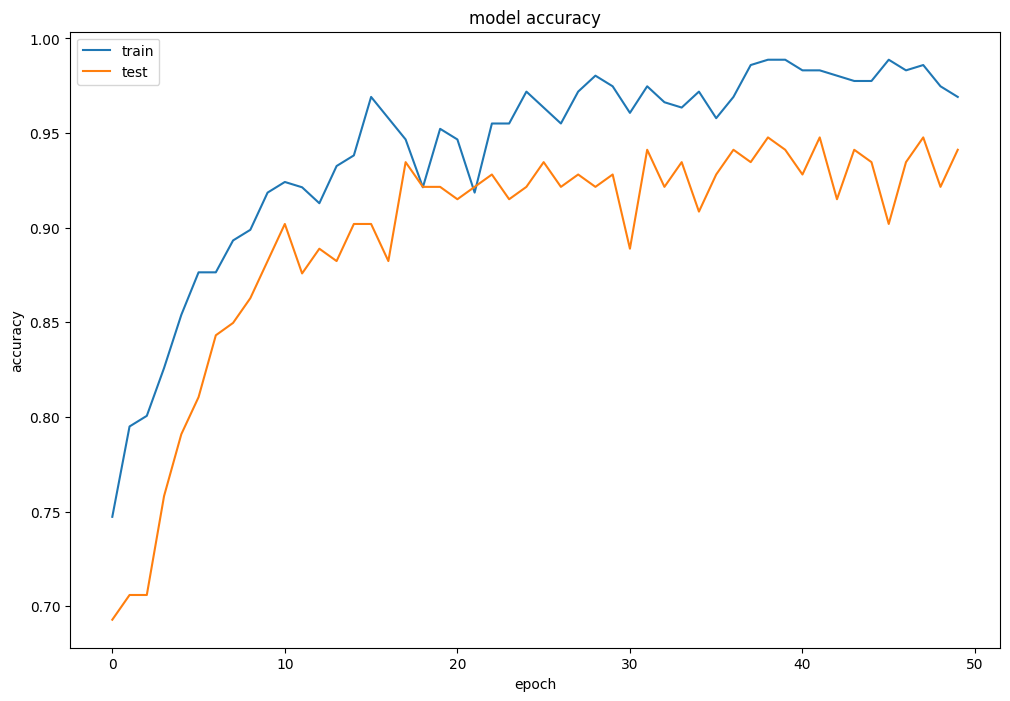

In [ ]:
#final plot with accuracy of train and test
history = model.fit(x,y,validation_split = 0.3, epochs=50, batch_size=20)
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(30,30))
mlp.fit(x_train,y_train)
pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
rs1=r2_score(y_train,pred_train)
mse1=mean_squared_error(y_train,pred_train)
rs1,mse1

(0.7868910610223063, 0.21245289428660163)

In [ ]:
rs2=r2_score(y_test,pred_test)
mse2=mean_squared_error(y_train,pred_train)
rs2,mse2

(0.17030807389020164, 0.21245289428660163)

In [ ]:
!pip install keras 
!pip install tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model=Sequential()
model.add(Dense(15,input_dim=30,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["mean_squared_error"])

In [ ]:
history=model.fit(x,y,validation_split=0.33,epochs=250,batch_size=10)
scores=model.evaluate(x,y)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))
history.history.keys()

Epoch 1/250
35/35 [==============================] - 2s 18ms/step - loss: 1.0960 - mean_squared_error: 1.2765 - val_loss: 0.8181 - val_mean_squared_error: 1.5520
Epoch 2/250
35/35 [==============================] - 0s 11ms/step - loss: 0.8560 - mean_squared_error: 1.1796 - val_loss: 0.6622 - val_mean_squared_error: 1.4868
Epoch 3/250
35/35 [==============================] - 0s 7ms/step - loss: 0.6748 - mean_squared_error: 1.0990 - val_loss: 0.5396 - val_mean_squared_error: 1.4349
Epoch 4/250
35/35 [==============================] - 0s 10ms/step - loss: 0.5420 - mean_squared_error: 1.0404 - val_loss: 0.4360 - val_mean_squared_error: 1.3892
Epoch 5/250
35/35 [==============================] - 0s 8ms/step - loss: 0.4322 - mean_squared_error: 1.0006 - val_loss: 0.3529 - val_mean_squared_error: 1.3519
Epoch 6/250
35/35 [==============================] - 0s 9ms/step - loss: 0.3312 - mean_squared_error: 0.9706 - val_loss: 0.2895 - val_mean_squared_error: 1.3224
Epoch 7/250
35/35 [============

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

Conclusion

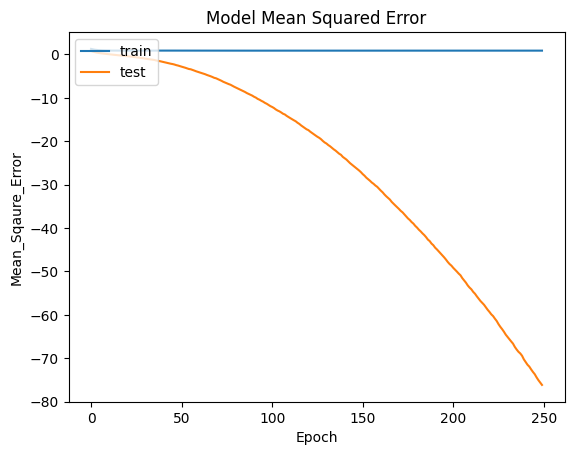

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["mean_squared_error"])
plt.plot(history.history["val_loss"])
plt.title("Model Mean Squared Error")
plt.ylabel("Mean_Sqaure_Error")
plt.xlabel("Epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

* We obtained the best possible and acceptable accuracy with the Keras classifire.